In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#import matplotlib.dates as mdates
#from matplotlib.dates import MO
from scipy import polyval, stats
%matplotlib inline

mystyle = r'https://gist.githubusercontent.com/mbolt01/3087dffd11e70eccb08fdcf327374a5c/raw/std_fig'
plt.style.use(mystyle)

from matplotlib.dates import DateFormatter
my_date_format = DateFormatter('%b-%Y') # mmm-yyyy
#plt.gcf().axes[0].xaxis.set_major_formatter(my_date_format)


In [2]:
## create map of centre locations
import cartopy.feature as cfeat
import cartopy.crs as ccrs # for mapping
#from geopy.geocoders import GoogleV3
import time

#geolocator = GoogleV3()
file = 'postcodes_lat_lng.csv'
postcodes = pd.read_csv(file,index_col=0)

C:\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:504: UserWarning: This method has been deprecated. Please use `add_feature` instead.
  warnings.warn('This method has been deprecated.'


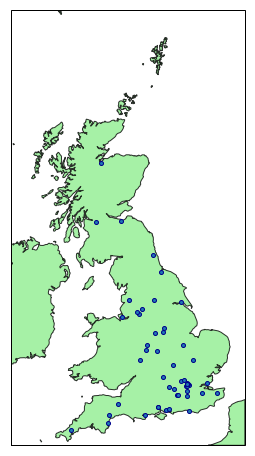

In [3]:
## customised points based on the 'group'
plt.figure(figsize=(10.0, 8.0))
ax = plt.axes(projection=ccrs.OSGB())
#ax.coastlines(resolution='10m')
#ax.stock_img()
ax.natural_earth_shp(resolution='10m',facecolor='lightgreen',edgecolor='black',lw=0.5,alpha=0.8)
ax.set_global() # set the extend of the map to the default for OSGB
#ax.add_feature(cfeat.BORDERS, linestyle='-',lw=0.5)

plt.plot(postcodes['lng'],postcodes['lat'],ls='',
         marker='o',ms=4,alpha=1,markeredgecolor='darkblue',
         transform=ccrs.PlateCarree())
#plt.savefig('uk_output_map.png',dpi=500,bbox_inches='tight')
plt.show()

In [4]:
filepath = 'OP_all_data_5perc_cutoff_NEW-2017-CorrOP.pkl'
df = pd.read_pickle(filepath)

In [5]:
df.head(1)

,Centre_ID,NHS_PP,Group,Linac_Manufacturer,Linac_Model,Linac_Install_Date,Linac_ID,Date,Measurement_Device,OP_Dif,Recording,Comments,Week,Month,Farmer,date_delta,Short_Date,weekday,DateCat,Corr_OP
14268,20,NHS,3,Varian,TrueBeam,?,115,2015-01-01,Diodes,-1.290165,"Daily = electronic, Weekly Farmer = Paper",Centre noted increased uncertainty for diode r...,1,1,Non-Farmer,0.0,01/01/2015,3,0,-1.290165


In [6]:
## who uses each device

print(df.columns)
print(df['Measurement_Device'].unique())

## list centre numbers for each device

for device in df['Measurement_Device'].unique():
    data=df[df['Measurement_Device']==device]['Centre_ID'].unique()
    print(device,data)

Index(['Centre_ID', 'NHS_PP', 'Group', 'Linac_Manufacturer', 'Linac_Model',
       'Linac_Install_Date', 'Linac_ID', 'Date', 'Measurement_Device',
       'OP_Dif', 'Recording', 'Comments', 'Week', 'Month', 'Farmer',
       'date_delta', 'Short_Date', 'weekday', 'DateCat', 'Corr_OP'],
      dtype='object')
['Diodes' 'PTW QC6' 'Linacheck' 'LinaCheck' 'BeamChecker' 'DQA3'
 'SunNuclear DailyQA 3' 'CheckMate' 'QA3' 'Farmer' 'Sun Nuclear Checkmate'
 'PTW QuickCheck' 'SNC Checkmate' 'Victoreen Double Check'
 'PTW QuickCheck Webline' 'QA BeamChecker Plus' 'Farmer Chamber in Water'
 'D44' 'Delta4' 'BeamChecker Plus' 'Machine Performance Check' 'D42'
 'DoseChecker' 'QuickCheck']
Diodes [20]
PTW QC6 [39]
Linacheck [ 1  3 11  2 51 12  6 49 25]
LinaCheck [10 24]
BeamChecker [19 50 10]
DQA3 [44 22 28 45 17 33 38 32 35 36 34 30 29 31 26 48]
SunNuclear DailyQA 3 [21]
CheckMate [26 48]
QA3 [ 2  4 40 52  9]
Farmer [10 51 37 18 46 12 14  1 49 31 28 41 19 29 39 22 34 30 27 32 47  5  7  6 16
 23 36 35 13 2

In [7]:
## how many of each linac manufacturer
mans = df['Linac_Manufacturer'].unique()

print('Number of Treatment Machines-----------')
#print('------Using slicing')
#for man in mans:
#    print(man, len(df[df['Linac_Manufacturer']==man]['Linac_ID'].unique()))

## using groupby method:
#print('------Using groupby()')
g = df.groupby('Linac_Manufacturer')['Linac_ID'].unique()
for a,b in g.items():
    print(a,len(b))
    
print('Number of Measurement Device ---------')
g = df.groupby('Measurement_Device')['Centre_ID'].unique()
for a,b in g.items():
    print(a,len(b))
    
## note that both these methods use the same number of lines of code.
## groupby should be more useful to get additional data - e.g. plots?

Number of Treatment Machines-----------
CyberKnife 1
Elekta 92
Siemens 12
Tomotherapy 3
Varian 96
Number of Measurement Device ---------
BeamChecker 3
BeamChecker Plus 1
CheckMate 2
D42 1
D44 1
DQA3 16
Delta4 1
Diodes 1
DoseChecker 1
Farmer 36
Farmer Chamber in Water 1
LinaCheck 2
Linacheck 9
Machine Performance Check 1
PTW QC6 1
PTW QuickCheck 2
PTW QuickCheck Webline 1
QA BeamChecker Plus 1
QA3 5
QuickCheck 1
SNC Checkmate 1
Sun Nuclear Checkmate 1
SunNuclear DailyQA 3 1
Victoreen Double Check 1


In [8]:
## get some stats etc

print('mean',np.mean(df['OP_Dif']))
print('max',np.max(df['OP_Dif']))
print('min',np.min(df['OP_Dif']))
print('std',np.std(df['OP_Dif']))
print('95th',np.percentile(df['OP_Dif'],95))
print('5th',np.percentile(df['OP_Dif'],5))
print('75th',np.percentile(df['OP_Dif'],75))
print('25th',np.percentile(df['OP_Dif'],25))

mean -0.00935364871923632
max 3.98
min -4.4
std 0.8780457765590578
95th 1.41025641
5th -1.493308759
75th 0.561393201
25th -0.6


(0.9983039498329163, 1.4778639110954927e-15)
-0.00935364871923632


C:\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1329: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


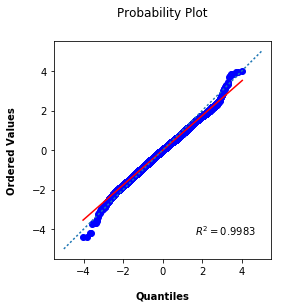

Rsquared: 0.998268193572
Slope: 0.769873741812
Intercept: 8.74907443629e-05


In [9]:
## produce P-P plot to show data is normally distributed.
print(stats.shapiro(df['OP_Dif']))

res=stats.probplot(df['OP_Dif'],plot=plt)
print(df['OP_Dif'].mean())
plt.axes().set_aspect('equal')

plt.plot([-5,5],[-5,5],ls=':')

plt.show()
print('Rsquared:',res[1][2]**2)
print('Slope:',res[1][0]**2)
print('Intercept:',res[1][1]**2)



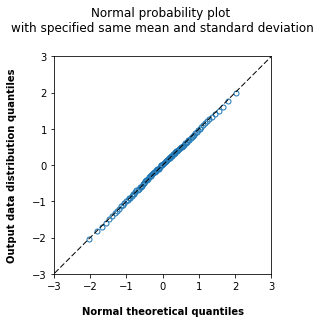

In [10]:
## produce Q-Q plot to show data is normally distributed.
data = df['OP_Dif'].tolist()
norm = list(np.random.normal(loc=np.mean(df['OP_Dif']),scale=np.std(df['OP_Dif']),size=len(data)))
#norm = list(np.random.uniform(0,1,size=10000))
#norm = list(np.random.normal(loc=0,scale=0.84,size=100000))


norm_qs = []
data_qs = []

for i in range(1,100,1):
    norm_q = np.percentile(norm,i)
    data_q = np.percentile(data,i)
    norm_qs.append(norm_q)
    data_qs.append(data_q)


plt.plot(norm_qs,data_qs,'o',ms=5,markerfacecolor='None',markeredgecolor='C0',alpha=1)

plt.plot([-5,5],[-5,5],ls='--',zorder=2,color='black',lw=1)

plt.xlim(-3,3)
plt.ylim(-3,3)
plt.axes().set_aspect('equal')

plt.xlabel('Normal theoretical quantiles')
plt.ylabel('Output data distribution quantiles')
plt.title('Normal probability plot \nwith specified same mean and standard deviation')

#plt.savefig('P-P (normal probability plot) of op data.png',dpi=300,bbox_inches='tight')
plt.show()


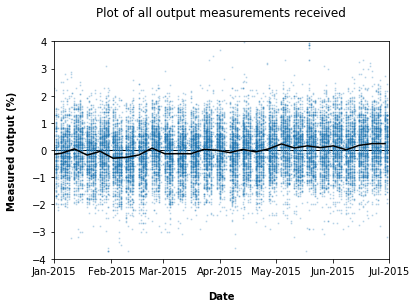

In [11]:
## plot of all data

plt.plot(df['Date'],df['OP_Dif'],'o',alpha=0.2,ms=1)

plt.axhline(0,color='black',lw=1,zorder=0)

plt.gcf().axes[0].xaxis.set_major_formatter(my_date_format)

plt.xlim('01-Jan-2015','01-Jul-2015')
plt.ylim(-4,4)

plt.title('Plot of all output measurements received')
plt.xlabel('Date')
plt.ylabel('Measured output (%)')

## add the mean for each week...
weeks = sorted(df['Week'].unique())
days = []
means = []
for week in weeks:
    data = df[df['Week']==week]
    mean = data['OP_Dif'].mean()
    day = data['Date'].min()
    means.append(mean)
    days.append(day)
    
plt.plot(days,means,c='black')


#plt.savefig('all_outputs.png',dpi=300,bbox_inches='tight')

plt.show()

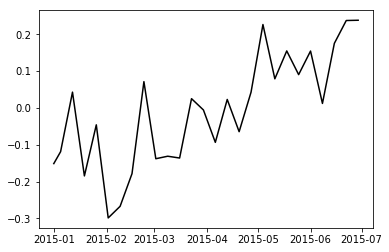

In [12]:
plt.plot(days,means,c='black')

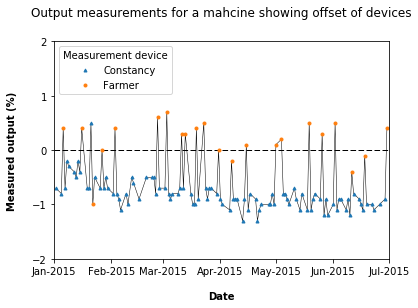

In [13]:
the_linac = 74 ## machine 36 shows all the major features of the data

## get linacs data
data = df[(df['Linac_ID']==the_linac)]

## plot all data line
plt.axhline(0,ls='--',color='black',lw=1)
plt.plot(data['Date'],data['OP_Dif'],lw=0.5,c='black',label="")

## plot constancy
constancy = df[(df['Linac_ID']==the_linac) & (df['Farmer']!='Farmer')]
plt.plot(constancy['Date'],constancy['OP_Dif'],'^',ms=3,label = 'Constancy')

## plot farmer
farmer = df[(df['Linac_ID']==the_linac) & (df['Farmer']=='Farmer')]
plt.plot(farmer['Date'],farmer['OP_Dif'],'o',ms=3,label = 'Farmer')

## plot each measurement device seperately


plt.ylim(-2,2)
plt.yticks([-2,-1,0,1,2])
plt.xlim('01-Jan-2015','01-Jul-2015')
plt.gcf().axes[0].xaxis.set_major_formatter(my_date_format)
plt.xlabel('Date')
plt.ylabel('Measured output (%)')
#plt.title('Measured beam output: Treatment machine ' + str(the_linac))
plt.title('Output measurements for a mahcine showing offset of devices')

plt.legend(title='Measurement device',loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(title='Measurement device',loc='upper left')

#plt.savefig('output_plot-farmer+constancy-'+str(the_linac)+'.png',dpi=300,bbox_inches='tight')
#plt.savefig('output_plot-farmer+constancy-example.png',dpi=300,bbox_inches='tight')
plt.show()

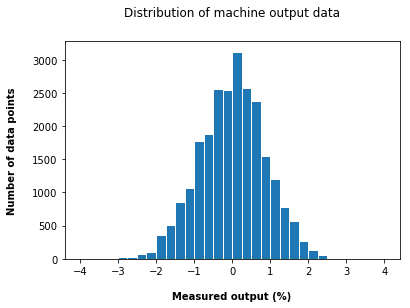

In [14]:
## histogram of all output measurements

plt.hist(df['OP_Dif'].values,range=(-4,4),bins=32,edgecolor='white')
plt.ylabel('Number of data points')
plt.xlabel('Measured output (%)')
plt.title('Distribution of machine output data')

#plt.savefig('Output_histogram-all.png',dpi=300, bbox_inches='tight')

plt.show()

Number of Treatment Machines at Site:


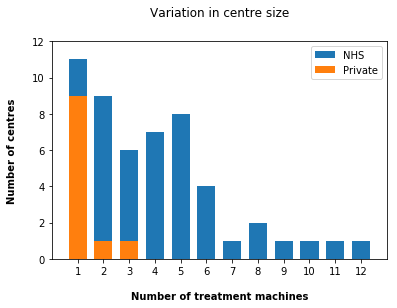

In [15]:
## number of linac in each centre (separated by NHS/PP):
  
centres = df['Centre_ID'].unique()

print('Number of Treatment Machines at Site:')
num_linacs = []
for centre in centres:
    centre_linacs = df[df['Centre_ID']==centre]['Linac_ID'].unique()
    #print(centre, len(centre_linacs))
    num_linacs.append(len(centre_linacs))
    
num_linacs_pp = []
pp_centres = df[df['NHS_PP']=='Private']['Centre_ID'].unique()
for centre in pp_centres:
    centre_linacs = df[(df['Centre_ID']==centre) & (df['NHS_PP']=='Private')]['Linac_ID'].unique()
    #print(centre, len(centre_linacs))
    num_linacs_pp.append(len(centre_linacs))

plt.hist(num_linacs,range=(0,13),bins=13,align='left',rwidth=0.7,label = 'NHS',facecolor='C0')
plt.hist(num_linacs_pp,range=(0,13),bins=13,align='left',rwidth=0.7, label='Private',facecolor='C1')#, hatch="//")
plt.title('Variation in centre size')
plt.xlabel('Number of treatment machines')
plt.ylabel('Number of centres')
plt.xlim(0,13)
plt.ylim(0,12)
plt.legend()
plt.xticks(np.arange(min(num_linacs), max(num_linacs)+1, 1.0)) ## ensure value is plotted for each point
plt.yticks()
#plt.savefig('Variation in site size.png',dpi=300, bbox_inches='tight')

plt.show()

1999 {'varian': 0, 'elekta': 1, 'ck': 0, 'total': 1, 'tomo': 0, 'siemens': 0}
2000 {'varian': 0, 'elekta': 2, 'ck': 0, 'total': 2, 'tomo': 0, 'siemens': 0}
2001 {'varian': 0, 'elekta': 2, 'ck': 0, 'total': 2, 'tomo': 0, 'siemens': 0}
2002 {'varian': 1, 'elekta': 6, 'ck': 0, 'total': 7, 'tomo': 0, 'siemens': 0}
2003 {'varian': 2, 'elekta': 4, 'ck': 0, 'total': 7, 'tomo': 0, 'siemens': 1}
2004 {'varian': 3, 'elekta': 6, 'ck': 0, 'total': 12, 'tomo': 0, 'siemens': 3}
2005 {'varian': 9, 'elekta': 5, 'ck': 0, 'total': 16, 'tomo': 0, 'siemens': 2}
2006 {'varian': 11, 'elekta': 8, 'ck': 0, 'total': 19, 'tomo': 0, 'siemens': 0}
2007 {'varian': 10, 'elekta': 10, 'ck': 0, 'total': 21, 'tomo': 1, 'siemens': 0}
2008 {'varian': 4, 'elekta': 2, 'ck': 1, 'total': 14, 'tomo': 1, 'siemens': 6}
2009 {'varian': 10, 'elekta': 5, 'ck': 0, 'total': 16, 'tomo': 1, 'siemens': 0}
2010 {'varian': 10, 'elekta': 5, 'ck': 0, 'total': 15, 'tomo': 0, 'siemens': 0}
2011 {'varian': 3, 'elekta': 4, 'ck': 0, 'total': 7,

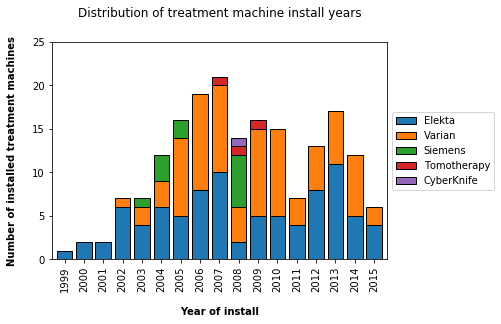

In [16]:
## machine install years
## create DF of install years

years = list(df['Linac_Install_Date'].unique())
## number of unknown = 17 (so 187 have dates)
## remember that age of ionisation chamber is probably more reprasentative of output trends

## years are strings within the original dataframe, so convert to numbers(simpler plotting) and remove unknowns
year_nums = [int(year) for year in years if year not in ['?']]

## store data
year_data = {}

## get data
for year in year_nums:
    year_elekta = len(list(df[(df['Linac_Install_Date']==str(year)) & (df['Linac_Manufacturer']=='Elekta')]['Linac_ID'].unique()))
    year_varian = len(list(df[(df['Linac_Install_Date']==str(year)) & (df['Linac_Manufacturer']=='Varian')]['Linac_ID'].unique()))
    year_siemens = len(list(df[(df['Linac_Install_Date']==str(year)) & (df['Linac_Manufacturer']=='Siemens')]['Linac_ID'].unique()))
    year_tomo = len(list(df[(df['Linac_Install_Date']==str(year)) & (df['Linac_Manufacturer']=='Tomotherapy')]['Linac_ID'].unique()))
    year_ck = len(list(df[(df['Linac_Install_Date']==str(year)) & (df['Linac_Manufacturer']=='CyberKnife')]['Linac_ID'].unique()))
    
    year_data[year] = {'elekta':year_elekta,
                      'varian':year_varian,
                      'siemens':year_siemens,
                      'tomo':year_tomo,
                      'ck':year_ck,
                      'total':year_elekta + year_varian + year_siemens + year_tomo + year_ck}

## check the data extraction worked and show the numerical results
for year in sorted(year_nums):
    print(year,year_data[year])

year_df = pd.DataFrame.from_dict(year_data).T

## *********

## create stacked plot

#ax = year_df[['elekta','varian','siemens', 'tomo', 'ck']].plot.bar(width=0.8,
#                                                                   edgecolor='black',
#                                                                   stacked=True,
#                                                                   legend=False,
#                                                                  color=['black','grey','white','white','white'])
#for container, hatch in zip(ax.containers, ("", "","","//",'.')):
#    for patch in container.patches:
#        patch.set_hatch(hatch)
        

## seperated manufacturers - stacked
year_df[['elekta','varian','siemens', 'tomo', 'ck']].plot.bar(width=0.8,edgecolor='black',stacked=True)

plt.ylim(0,25)
plt.ylabel('Number of installed treatment machines')
plt.xlabel('Year of install')
plt.title('Distribution of treatment machine install years')

plt.legend(['Elekta','Varian', 'Siemens', 'Tomotherapy', 'CyberKnife'],
           loc='center left', bbox_to_anchor=(1, 0.5)) ## overwrite default legend labels

#plt.savefig('Linac_Install_Year-manufacturers-stacked.png',dpi=300, bbox_inches='tight')

plt.show()

In [17]:
## variation in recording methods - stcaked bar plot to 100%

## generate the data **** and make a dataframe of it

## add col with s/m/l for each centre - use lower and upper quartiles - this is probably correct
## (or should use 4 and 8 to split 1-12 into thirds?- try both)

#small = 4.0 ## if splitting 12 into thirds
#large = 8.0

small = np.percentile(num_linacs,25) ## for using lower/upper quartiles
large = np.percentile(num_linacs,75)

## create dict of centre size s/m/l
size = {}

for centre in df['Centre_ID'].unique():
    num_linacs_in_centre = len(df[df['Centre_ID']==centre]['Linac_ID'].unique())

    if num_linacs_in_centre <= small:
        centre_size = 's'
    elif num_linacs_in_centre >= large:
        centre_size = 'l'
    else:
        centre_size = 'm'
    #print(centre,num_linacs_in_centre,centre_size)
    size[centre] = centre_size

## create function to return centre size for a centre so can 'apply' this to dataframe
def centre_size_val(centre):
    return size[centre]

## add new column containing the centre size so can filter based on this.
df['size'] = df.apply (lambda row: centre_size_val(row['Centre_ID']), axis=1)

## also add a column for electronic/paper etc - for simplicity, these are the centres with each type of recording
rec_paper = [1,3,7,12,15,24,39,42]
rec_elec = [2,4,5,8,9,11,14,16,17,18,21,22,23,27,28,29,30,31,32,33,34,35,36,37,40,41,43,44,45,46,47,51,52]
rec_mix = [6,10,13,19,20,25,26,38,48,49,50]

## function to determine recording type of centre
def rec_type(centre):
    if centre in(rec_paper):
        the_type = 'paper'
    elif centre in(rec_elec):
        the_type = 'elec'
    elif centre in(rec_mix):
        the_type = 'mix'
    else:
        the_type = 'error'
    return the_type

df['record_type'] = df.apply(lambda row: rec_type(row['Centre_ID']), axis=1)


                           elec  elec_perc  mix   mix_perc  paper  paper_perc
Small\n(n$\leq$2)          15.0  75.000000  4.0  20.000000    1.0    5.000000
Medium\n(3$\leq$n$\leq$4)   7.0  53.846154  3.0  23.076923    3.0   23.076923
Large\n(n$\geq$5)          11.0  57.894737  4.0  21.052632    4.0   21.052632


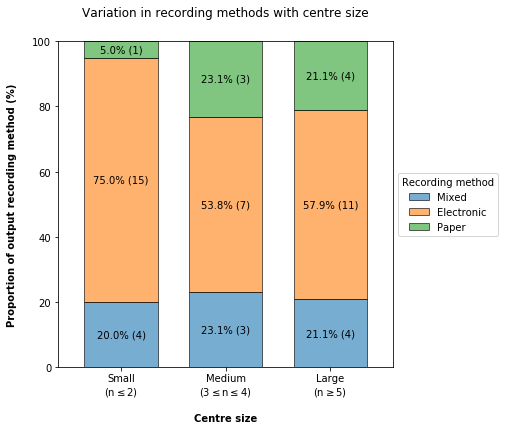

In [18]:
## make the plot

## get the results into a dict
results = {}
labels = {'s':'Small\n(n$\leq$2)',
         'm':'Medium\n(3$\leq$n$\leq$4)',
         'l':'Large\n(n$\geq$5)'}

for centre_size in ['s','m','l']:

    ## get the number of each type
    elec = len(df[(df['size']==centre_size) & (df['record_type'] == 'elec')]['Centre_ID'].unique())
    paper = len(df[(df['size']==centre_size) & (df['record_type'] == 'paper')]['Centre_ID'].unique())
    mix = len(df[(df['size']==centre_size) & (df['record_type'] == 'mix')]['Centre_ID'].unique())
    
    elec_perc = 100*elec/(elec+paper+mix)
    paper_perc = 100*paper/(elec+paper+mix)
    mix_perc = 100*mix/(elec+paper+mix)
    
    results[labels[centre_size]] = {'elec':elec,
                           'mix':mix,
                           'paper':paper,
                           'elec_perc':elec_perc,
                           'mix_perc':mix_perc,
                           'paper_perc':paper_perc}

## convert ot dataframe for simple plotting
## need to convert to % to create a stacked bar with equal height bars?

sml_df = pd.DataFrame.from_dict(results).T
sml_df = sml_df.iloc[::-1]
print(sml_df)
the_colors = ['lightgrey','white','black']
sml_df[['mix_perc','elec_perc','paper_perc']].plot.bar(stacked=True,#color=the_colors,
                                                       alpha=0.6,edgecolor='black',lw=1,figsize=(6,6), width=0.7)
plt.legend(title='Recording method',loc='center left', bbox_to_anchor=(1, 0.5),
           labels=['Mixed','Electronic','Paper'])

plt.ylabel('Proportion of output recording method (%)')
plt.xlabel('Centre size')
plt.title('Variation in recording methods with centre size')
plt.ylim(0,100)
plt.xticks(rotation=0)

## add labels for the data (semi manually...)

## position them correctly
text_x = {'s':0,
         'm':1,
         'l':2}

sml_df[sml_df.index==labels['l']]['elec_perc'].values[0]

for centre_size in ['s','m','l']:

    mix_val = sml_df[sml_df.index==labels[centre_size]]['mix_perc'].values[0]
    elec_val = sml_df[sml_df.index==labels[centre_size]]['elec_perc'].values[0]
    paper_val = sml_df[sml_df.index==labels[centre_size]]['paper_perc'].values[0]
    
    mix_val_abs = sml_df[sml_df.index==labels[centre_size]]['mix'].values[0]
    elec_val_abs = sml_df[sml_df.index==labels[centre_size]]['elec'].values[0]
    paper_val_abs = sml_df[sml_df.index==labels[centre_size]]['paper'].values[0]
    
    mix_posn = mix_val/2
    elec_posn = mix_val + elec_val/2
    paper_posn = mix_val  +elec_val + paper_val/2
    
    mix_val_format = str(round(mix_val,1)) + '% (' + str(int(mix_val_abs)) + ')'
    elec_val_format = str(round(elec_val,1)) + '% (' + str(int(elec_val_abs)) + ')'
    paper_val_format = str(round(paper_val,1)) + '% (' + str(int(paper_val_abs)) + ')'
    
    plt.text(text_x[centre_size],elec_posn,elec_val_format,horizontalalignment='center',verticalalignment='center')
    plt.text(text_x[centre_size],mix_posn,mix_val_format,horizontalalignment='center',verticalalignment='center')
    plt.text(text_x[centre_size],paper_posn,paper_val_format,horizontalalignment='center',verticalalignment='center')#,color='white')

#plt.savefig('recording-method-(2-5 split)-all-stacked_bar.png',dpi=300, bbox_inches='tight')
plt.show()

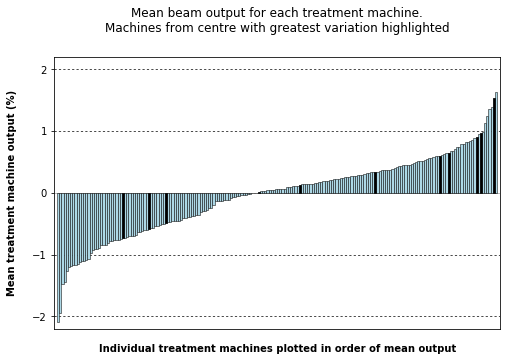

In [19]:
do_save = False

linacs = df['Linac_ID'].unique()

mean_op_dict = {}

for linac in linacs:
    mean_op = df[df['Linac_ID']==linac]['OP_Dif'].mean()
    mean_op_dict[linac] = mean_op
    #print(linac,mean_op)
    
mean_df = pd.DataFrame(list(mean_op_dict.items()),columns=['Linac_ID','Mean'])

centres = [10]
#centres = df['Centre_ID'].unique()
for centre in centres:
    sorted_means = mean_df.sort_values(by='Mean')
    sorted_means['order'] = list(range(len(sorted_means)))

    #print(sorted_means['Mean'])

    ## plot all data bars
    plt.figure(figsize=(8,5))
    plt.bar(height=sorted_means['Mean'].values,left=sorted_means['order'].values,
            edgecolor='black', linewidth=0.5,color='lightblue',width=1)

    ## get data to highlight a single centre on the plot
    centre_linacs = list(df[df['Centre_ID']==centre]['Linac_ID'].unique())
    centre_means = sorted_means[sorted_means['Linac_ID'].isin(centre_linacs)]

    plt.bar(height=centre_means['Mean'].values,left=centre_means['order'].values,
            edgecolor='black',linewidth=0.5,color='black',width=1)

    ## add details to plot
        
    plt.tick_params(labelbottom='off', bottom='off')   
    
    plt.ylabel('Mean treatment machine output (%)')
    plt.xlabel('Individual treatment machines plotted in order of mean output')

    title = 'Mean beam output for each treatment machine.\nMachines from centre with greatest variation highlighted'

    plt.title(title)
    for val in [2,1,-1,-2]:
        plt.axhline(val,ls=':',c='black', alpha=0.7, lw=1,zorder=0)
    plt.axhline(0,ls='-',c='black', alpha=0.5, lw=0.5)
    savename = r'centre_mean_var.png'

    plt.ylim(-2.2,2.2)
    plt.xlim(-2,205)
    
    plt.yticks([-2,-1,0,1,2])

    if do_save == True:
        plt.savefig(savename,dpi=300,bbox_inches='tight')
        #plt.clf()
        print(centre)
    else:
        plt.show()

## Beam trends over time
- by age
- by manufacturer
- by linac model

In [20]:
linacs = df['Linac_ID'].unique()

lin_fit_corr = {}

for linac in linacs:

    my_x = df[(df['Linac_ID']==linac)]['date_delta']
    my_y_corr = df[df['Linac_ID']==linac]['Corr_OP']

    fit_output_corr = stats.linregress(my_x, my_y_corr)
    slope_corr, intercept_corr, r_value_corr, p_value_corr, slope_std_error_corr = fit_output_corr
    
    fit_dict_corr = {'slope':slope_corr,
                     'slope_year':slope_corr*365,
                'intercept':intercept_corr,
                'r_value':r_value_corr,
                'slope_std_error':slope_std_error_corr}
    
    lin_fit_corr[linac] = fit_dict_corr
    
## store in a DF

trend_df = pd.DataFrame.from_dict(lin_fit_corr).T
trend_df = trend_df.reset_index()
trend_df.rename(columns = {'index':'Linac_ID'}, inplace = True)

trend_df.head(2)

,Linac_ID,intercept,r_value,slope,slope_std_error,slope_year
0,1,-0.494273,-0.172677,-0.001178,0.000611,-0.429985
1,2,-1.199707,0.587021,0.009476,0.001164,3.458648


In [21]:
trend_df.describe(percentiles=[0.05,0.25,0.75,0.95])

,Linac_ID,intercept,r_value,slope,slope_std_error,slope_year
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,102.500000,-0.260701,0.188668,0.002450,0.001099,0.894256
std,59.033889,0.824485,0.434191,0.006224,0.001040,2.271918
min,1.000000,-3.829130,-0.884204,-0.024559,0.000289,-8.963879
5%,11.150000,-1.586117,-0.614773,-0.006085,0.000464,-2.221118
25%,51.750000,-0.771422,-0.103931,-0.000948,0.000630,-0.345986
50%,102.500000,-0.253726,0.212168,0.001539,0.000814,0.561636
75%,153.250000,0.278272,0.531085,0.005903,0.001092,2.154646
95%,193.850000,1.025842,0.815342,0.013903,0.002517,5.074636
max,204.000000,1.613189,0.892559,0.022969,0.008391,8.383642


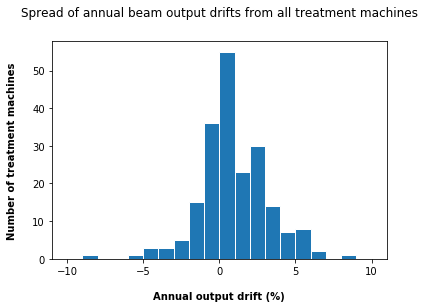

In [22]:
## plot annual trends histogram
plt.hist(trend_df['slope_year'], edgecolor='white', range=(-10,10),bins=20)
plt.xticks([-10,-5,0,5,10])
plt.xlabel('Annual output drift (%)')
plt.ylabel('Number of treatment machines')
plt.title('Spread of annual beam output drifts from all treatment machines')
plt.show()

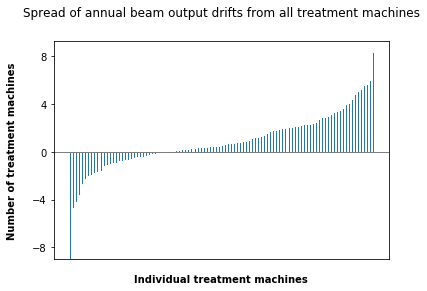

In [23]:
## plot annual trends bar plot - like linac means.
## the histogram is probably a better representation...

data = sorted(trend_df['slope_year'].tolist())
plt.bar([i for i in range(len(data))],data,edgecolor='white',width=1)

plt.xticks([])
plt.yticks([-8,-4,0,4,8])
plt.axhline(0,color='black',lw=0.5)
plt.xlabel('Individual treatment machines')
plt.ylabel('Number of treatment machines')
plt.title('Spread of annual beam output drifts from all treatment machines')
plt.show()

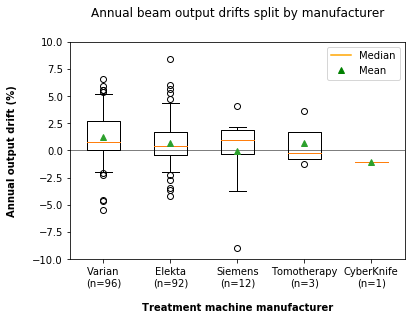

In [24]:
## use both the df and trend_df to get groups of data - e.g. dif manufacturers to plot these as boxplots and do stats

all_man_trends = []
all_mans = []
all_man_n = []

for manufacturer in df['Linac_Manufacturer'].unique():
    man_linacs = list(df[df['Linac_Manufacturer']==manufacturer]['Linac_ID'].unique())
    slope_data = list(trend_df[(trend_df['Linac_ID'].isin(man_linacs))]['slope_year'].dropna().values)
    
    all_man_trends.append(slope_data)
    all_mans.append(manufacturer)
    all_man_n.append(len(slope_data))

    
plot_labels = [all_mans[i] + '\n(n=' + str(all_man_n[i]) +')' for i in range(len(all_mans))]
plt.boxplot(all_man_trends,labels=plot_labels,
           whis=[5,95], showfliers=True,showmeans=True)
plt.axhline(0,color='black',alpha=0.5,lw=1)
plt.ylim(-10,10)
plt.ylabel('Annual output drift (%)')
plt.xlabel('Treatment machine manufacturer')
plt.title('Annual beam output drifts split by manufacturer')

## add fake points for legend creation
plt.plot([0,0],[0,0],c='orange',label='Median')
plt.plot(0,1,c='green',label='Mean',ls='',marker='^')
plt.legend()

#plt.savefig('Annual_Manufacturer_Output_Trends.png',dpi=300,bbox_inches='tight')
plt.show()



Agility n: 22 mean: 1.04766519032 sd: 1.72668616797
Precise n: 25 mean: 0.545291986995 sd: 2.07211957399
Elekta Beam Modulator n: 4 mean: 0.604683494167 sd: 1.16176749567
Synergy n: 26 mean: 0.288132757802 sd: 1.61788586915
Trilogy n: 2 mean: 0.490799601346 sd: 0.228275874354
Edge n: 1 mean: 0.352288567728 sd: 0.0
MLCi n: 4 mean: 0.54714748418 sd: 1.17866848794
Artiste n: 2 mean: 3.07236470987 sd: 1.04216698589
Hi-Art n: 3 mean: 0.720957907411 sd: 2.11254869184
Clinac 21EX n: 1 mean: 5.10157950237 sd: 0.0
Oncor n: 10 mean: -0.682423303238 sd: 3.25445812116
TrueBeam n: 23 mean: 2.13204816209 sd: 1.96881314365
Clinac DMX S n: 1 mean: 0.243718778025 sd: 0.0
Novalis Tx n: 3 mean: 2.11202235151 sd: 1.89249138125
Silhouette n: 1 mean: 0.821019833299 sd: 0.0
Versa HD n: 5 mean: 1.4562913151 sd: 0.87283716443
2100 n: 53 mean: 1.05677919681 sd: 2.37135886156
SL-18 n: 2 mean: -1.41320921036 sd: 2.76108549872
Clinac 600C n: 11 mean: -0.20015861529 sd: 1.75521403511
MLC n: 4 mean: 3.02281298516 sd

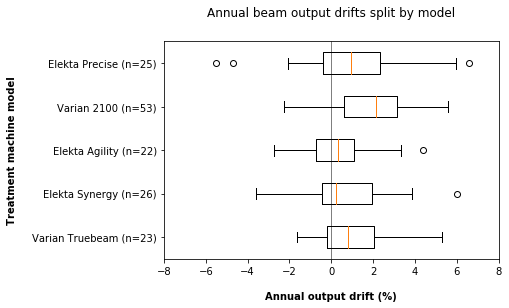

In [25]:
## same as above for differnt models

all_models = [
             ['TrueBeam','TrueBeam STx v2.0','TrueBeam STx V2.0','TrueBeam V2.0','TrueBeam STx','TrueBeam Slim','TrueBeam Slim v2.0'],
             ['Synergy'],
             ['Precise','Elekta Precise Standard Head MLCi'],
             ['2100','Clinac iX','Clinac 2100iX','2100 iX','iX','2100CD','Clinac 2100EX','iXs','Clinac 2100CD','Clinac 2100 iX'],
             ['Agility'],
             ['Oncor'],
             ['Clinac 600C','Clinac 600 C/D','600','600C','6100C','600CD'],
             ['Versa HD','VersaHD'],
             ['Novalis Tx',],
             ['Elekta Beam Modulator','Beam Mod'],
             ['Artiste',],
             ['Hi-Art',],
             ['Trilogy'],
             ['MLCi'],
             ['SL-18','Sli'],
             ['Silhouette'],
             ['Edge'],
             ['G4'],
             ['MLC'],
             ['Clinac DMX S'],
             ['Clinac 21EX'],
             ]

model_trend_data = {}

for model in all_models:
    model_name = model[0]
    ## get the ids of each linac which matches the models
    linacs = df[df['Linac_Model'].isin(model)]['Linac_ID'].unique()
    
    ## get the slopes of these linacs
    slope_data = trend_df[trend_df['Linac_ID'].isin(linacs)]['slope_year'].tolist()
    
    model_trend_data[model_name] = slope_data
    
#print(model_trend_data)

datas = []
labels = []
for model in model_trend_data.keys():
    model_count = len(model_trend_data[model])
    model_mean = np.mean(model_trend_data[model])
    model_sd = np.std(model_trend_data[model])
    print(model,'n:',model_count,'mean:',model_mean,'sd:',model_sd)
    
    if model_count>20:
        datas.append(model_trend_data[model])
        labels.append(model)

fake_labels = reversed(['Elekta Precise (n=25)',
                        'Varian 2100 (n=53)',
                        'Elekta Agility (n=22)',
                        'Elekta Synergy (n=26)',
                        'Varian Truebeam (n=23)'])
plt.boxplot(datas,labels = list(fake_labels),vert=False)

plt.xticks(rotation=0)

    
plt.axvline(0,color='black',alpha=1,lw=0.5,zorder=0)
plt.xlim(-8,8)
plt.xlabel('Annual output drift (%)')
plt.ylabel('Treatment machine model')
plt.title('Annual beam output drifts split by model')

#plt.savefig('Annual_model_Output_Trends.png',dpi=300,bbox_inches='tight')
plt.show()

## no significant difference between linac models identified.
## poissibly Truebeams trend quicker because they are all newer...?

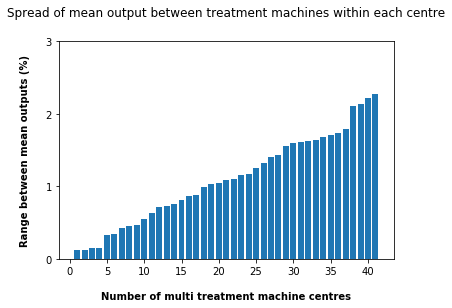

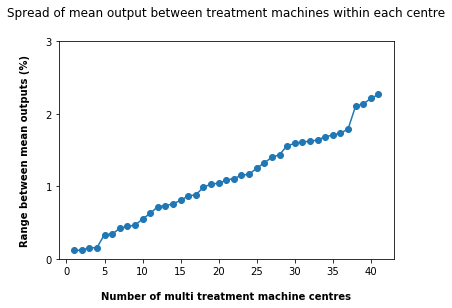

In [26]:
## plot if inter-centre mean output variaiton

## store results in dict
centre_ranges = {}
for centre in sorted(df['Centre_ID'].unique()):
    ## loop linacs in each centre and get store their means
    linac_means = []
    for linac in df[(df['Centre_ID']==centre)]['Linac_ID'].unique():
        data = df[(df['Centre_ID']==centre) & (df['Linac_ID']==linac)]['OP_Dif'].tolist()
        data_mean = np.mean(data)
        linac_means.append(data_mean)
    centre_ranges[centre] = linac_means

## calc range and store values in list to plot

all_ranges = []
for centre in centre_ranges:
    #print(centre)
    mean_range = max(centre_ranges[centre])-min(centre_ranges[centre])
    all_ranges.append(mean_range)
    
multi_linac_ranges = [i for i in all_ranges if i !=0]

plt.bar(left=range(1,len(multi_linac_ranges)+1),height=sorted(multi_linac_ranges))
#plt.xticks([])
plt.yticks([0,1,2,3])
plt.xlabel('Number of multi treatment machine centres')
plt.ylabel('Range between mean outputs (%)')
plt.title('Spread of mean output between treatment machines within each centre')
#plt.savefig('centre_mean_range.png',dpi=300,bbox_inches='tight')
plt.show()

## non bar chart

## add number of centres as y?
plt.plot(range(1,len(multi_linac_ranges)+1),sorted(multi_linac_ranges),marker='o')
#plt.xticks([])
plt.yticks([0,1,2,3])
plt.xlabel('Number of multi treatment machine centres')
plt.ylabel('Range between mean outputs (%)')
plt.title('Spread of mean output between treatment machines within each centre')
#plt.savefig('centre_mean_range-line.png',dpi=300,bbox_inches='tight')
plt.show()

## Analysis of consitency of devices by examining the SD of residuals from linear fits

In [27]:
## get list of centres with both farmer and non measurements

both = []
farmer = []
nonfarmer = []

linacs = sorted(df['Linac_ID'].unique())
for linac in linacs:
    recording = df[df['Linac_ID']==linac]['Farmer'].unique()
    if len(recording) == 2:
        both.append(linac)
    else:
        if recording == ['Non-Farmer']:
            nonfarmer.append(linac)
        if recording == ['Farmer']:
            farmer.append(linac)
print('Both',len(both)) ## have 99 linacs with Farmer and Non Farmer data.
print('Farmer',len(farmer))
print('Non Farmer',len(nonfarmer))

Both 99
Farmer 39
Non Farmer 66


In [28]:
## list of linacs with < 5 results as indicates < monthly measurements so less reliable statistically.
cutoff = 5
small_nums = []
for linac in both:
    count_farmer = len(df[(df['Linac_ID']==linac) & (df['Farmer']=='Farmer')]['Corr_OP'].values)
    count_consistency = len(df[(df['Linac_ID']==linac) & (df['Farmer']!='Farmer')]['Corr_OP'].values)
    if (count_farmer < cutoff) or (count_consistency < cutoff):
        small_nums.append(linac)
        print(linac,count_farmer,count_consistency)
print(small_nums) # linacs to exclude from analysis

new_both = [i for i in both if i not in small_nums]
print(len(new_both))

14 4 136
83 74 1
95 4 127
98 3 123
[14, 83, 95, 98]
95


In [29]:
df = df[(df['Linac_ID'].isin(new_both))] ## create seperate dataframe for simplicity

## want to remove any sets of data with less than 5 results as < monthly measurements
print(len(df['Linac_ID'].unique()))

95


In [30]:
## get the type of consistency device for each linac into a dict
single_con_devices = []
multi_con_devices = []
for linac in new_both:
    con_devices = df[(df['Linac_ID']==linac) & (df['Farmer']!='Farmer')]['Measurement_Device'].unique()
    if len(con_devices) == 1:
        single_con_devices.append(linac)
    else:
        multi_con_devices.append(linac)
    for con_device in con_devices:
        con_device_count = df[(df['Linac_ID']==linac) & (df['Farmer']!='Farmer') & (df['Measurement_Device']==con_device)]['Measurement_Device'].count()
        print(linac,con_device,con_device_count)
    #print(linac,con_devices)
    print('-----')
    
print(len(single_con_devices)) ##  there are 75 linacs which use a single consistency device
print(len(multi_con_devices)) ##  there are 20 linacs which use a single consistency device

1 Linacheck 102
-----
2 Linacheck 106
-----
3 Linacheck 70
3 Delta4 10
-----
4 Linacheck 69
4 Delta4 10
-----
5 Linacheck 100
-----
6 Linacheck 97
-----
7 Linacheck 66
-----
8 Linacheck 84
-----
9 Linacheck 38
9 QA3 15
9 Machine Performance Check 167
-----
10 QA3 25
10 Linacheck 108
-----
11 Linacheck 107
11 QA3 28
-----
12 Linacheck 113
12 QA3 28
-----
13 Linacheck 107
13 QA3 26
-----
15 Linacheck 110
15 QA3 27
-----
16 Linacheck 103
16 QA3 28
-----
17 Linacheck 101
17 QA3 30
-----
18 Linacheck 47
18 QA3 26
18 Machine Performance Check 103
-----
19 QA3 65
19 Linacheck 14
19 Machine Performance Check 72
-----
20 Linacheck 48
20 QA3 27
20 Machine Performance Check 79
-----
33 Linacheck 107
-----
34 Linacheck 108
-----
35 Linacheck 110
-----
36 Linacheck 97
-----
37 Linacheck 104
-----
38 Linacheck 111
-----
39 Linacheck 93
-----
53 BeamChecker 127
-----
54 BeamChecker 123
-----
55 BeamChecker 123
-----
56 BeamChecker 31
-----
57 BeamChecker 124
-----
58 BeamChecker 122
-----
59 LinaChec

In [31]:
## want to create new column to categorise the consistency devices and farmers better/ more generically.
## e.g. 'PTW Linacheck' and 'Linacheck' should just be 'Linacheck'
## there are 24 different devices listed.


## get lists of device types
for device in sorted(df['Measurement_Device'].unique()):
    print(device)
    
## create a dictionary to map these?

device_dict = {'BeamChecker' : 'beamchecker',
               'BeamChecker Plus' : 'beamchecker',
               'CheckMate' : 'checkmate',
               'D42' : 'dosecheck',
               'D44' : 'dosecheck',
               'DQA3' : 'dqa3',
               'Delta4' : 'delta4',
               'Diodes' : 'diodes',
               'DoseChecker' : 'dosecheck',
               'Farmer' : 'farmer',
               'Farmer Chamber in Water' : 'farmer',
               'LinaCheck' : 'linacheck',
               'Linacheck' : 'linacheck',
               'Machine Performance Check' : 'mpc',
               'PTW QC6' : 'quickcheck',
               'PTW QuickCheck' : 'quickcheck',
               'PTW QuickCheck Webline' : 'quickcheck',
               'QA BeamChecker Plus' : 'beamchecker',
               'QA3' : 'dqa3',
               'QuickCheck' : 'quickcheck',
               'SNC Checkmate' : 'checkmate',
               'Sun Nuclear Checkmate' : 'checkmate',
               'SunNuclear DailyQA 3' : 'dqa3',
               'Victoreen Double Check' : 'doublecheck',
              }

print(list(set(sorted(device_dict.values())))) ## list of unique values within the dict to ensure no mistakes - OK

## create list of new device values for df and then assign these to a column called 'Device_Type' in df.
def device_label (row):
    return device_dict[row['Measurement_Device']]

df['Device_Type'] = df.apply (lambda row: device_label (row),axis=1)

BeamChecker
BeamChecker Plus
CheckMate
DQA3
Delta4
Farmer
Farmer Chamber in Water
LinaCheck
Linacheck
Machine Performance Check
PTW QC6
PTW QuickCheck
PTW QuickCheck Webline
QA3
QuickCheck
Sun Nuclear Checkmate
['mpc', 'diodes', 'quickcheck', 'linacheck', 'dosecheck', 'checkmate', 'beamchecker', 'doublecheck', 'farmer', 'delta4', 'dqa3']


In [32]:
## mean difference between devices
means = {}
for linac in sorted(df['Linac_ID'].unique()):
    farmer = df[(df['Linac_ID']==linac) & (df['Farmer']=='Farmer')]['Corr_OP'].values
    consistency = df[(df['Linac_ID']==linac) & (df['Farmer']!='Farmer')]['Corr_OP'].values
    t_result = stats.ttest_ind(farmer,consistency,equal_var=False)
    means[linac] = {'farmer': farmer.mean(),
                   'consistency' : consistency.mean(),
                   'dif' : farmer.mean() - consistency.mean(),
                   'farmer_sd':farmer.std(),
                   'consistency_sd':consistency.std(),
                   't_test':t_result}
print(means[1])

{'consistency': -0.7023529411764704, 't_test': Ttest_indResult(statistic=5.7129603924071128, pvalue=9.6736547841710046e-06), 'farmer': -0.10476190476190476, 'farmer_sd': 0.45709870818559889, 'dif': 0.59759103641456568, 'consistency_sd': 0.22354179532260932}


In [33]:
def lin_fit_eqn(fit, n=2, y_var='y', x_var='x'):
    """Produce equation text from the fit provided to n decimal places
    in form y_var = <slope>x_var +/- intercept"""
    
    slope = str(round(fit.slope,n))
    intercept = str(round(fit.intercept,n))
    
    if fit.intercept >=0:
        sign = ' + '
    else:
        sign = ' - '
        intercept = intercept[1:]
    
    return y_var + ' = ' + slope + x_var + sign + intercept

In [34]:
## for each linac do a fit for each set of meurement device data and then get the residuals.
## store in dict: fits[linac_id]{device: { residuals , fit_slope, fit_intercept}}...

def lin_residual(grad, intercept, x_val, y_val):
    y_fit = (grad * x_val) + intercept
    residual = y_val - y_fit
    return residual

linacs = new_both ## list of linacs to work with

## do linear fit and storee results in dict for each linac.
## results will be %/day
fits = {}

for linac in linacs:
    
    ## need to loop through 'all' and each device and 'consistency
    
    ## all data ##
    
    linac_df = df[df['Linac_ID'] == linac]
    days = linac_df['date_delta'].values
    corr_op = linac_df['Corr_OP'].values
    fit_all = stats.linregress(days,corr_op)

    resids_all = []
    for i in range(len(days)):
        resid = lin_residual(fit_all.slope, fit_all.intercept, days[i], corr_op[i])
        resids_all.append(resid)
        
    all_linac_devices = linac_df['Device_Type'].unique()
        
    fits[linac] = {'all' : {'fit_slope' : fit_all.slope,
                            'fit_intercept' : fit_all.intercept,
                            'residuals' : resids_all,
                            'devices' : all_linac_devices}}
    
    ## all consistency devices combined ##
    
    consistency_df = linac_df[linac_df['Device_Type'] != 'farmer']
    days_consistency = consistency_df['date_delta'].values
    corr_op_consistency = consistency_df['Corr_OP'].values
    fit_consistency = stats.linregress(days_consistency,corr_op_consistency)

    resids_consistency = []
    for i in range(len(days_consistency)):
        resid = lin_residual(fit_consistency.slope, fit_consistency.intercept, days_consistency[i], corr_op_consistency[i])
        resids_consistency.append(resid)
    
    fits[linac]['consistency'] = {'fit_slope' : fit_consistency.slope,
                                  'fit_intercept' : fit_consistency.intercept,
                                  'residuals' : resids_consistency} 

    ## each different device ##
    
    all_linac_devices = linac_df['Device_Type'].unique()
    
    for device in linac_df['Device_Type'].unique():
    
        linac_device_df = linac_df[linac_df['Device_Type'] == device]
        days_device = linac_device_df['date_delta'].values
        corr_op_device = linac_device_df['Corr_OP'].values
        fit_device = stats.linregress(days_device,corr_op_device)
        resids_device = []
        for i in range(len(days_device)):
            resid_device = lin_residual(fit_device.slope, fit_device.intercept, days_device[i], corr_op_device[i])
            resids_device.append(resid_device)
    
        fits[linac][device] = {'residuals': resids_device,
                              'fit_slope' : fit_device.slope,
                              'fit_intercept': fit_device.intercept} ##  to add additional items from each device

print(fits[1]['farmer']['fit_intercept']) ## can get results from this.
##this example shows linac 1 farmer results fitted intercept.

-0.0722031825074


In [35]:
## get devices on linac 3:
print(fits[3]['all']['devices'])

## get SD of consistency device residuals
print(np.std(fits[3]['consistency']['residuals']))

## get slope of delta4 fit
print(fits[3]['delta4']['fit_slope'])

## get intercept of farmer fit
print(fits[3]['farmer']['fit_intercept'])

['linacheck' 'farmer' 'delta4']
0.70034558177
-0.010324137931
0.267413111225


consistency
n:  95
mean:  0.44966317367
sd:  0.159659628126
min:  0.168591608374
max:  0.955939484325
5th:  0.242906656089
95th:  0.761859151575
**
checkmate
n:  10
mean:  0.559467192115
sd:  0.224732083924
min:  0.263628863262
max:  0.955939484325
5th:  0.306317860366
95th:  0.90057545056
**
beamchecker
n:  14
mean:  0.451480678324
sd:  0.140009414572
min:  0.274132823772
max:  0.779148862622
5th:  0.278908224262
95th:  0.685353686295
**
quickcheck
n:  13
mean:  0.410298453981
sd:  0.173555796706
min:  0.181770579575
max:  0.745806736863
5th:  0.225654344756
95th:  0.719315833293
**
delta4
n:  2
mean:  0.992341847558
sd:  0.0378700991658
min:  0.954471748392
max:  1.03021194672
5th:  0.958258758309
95th:  1.02642493681
**
linacheck
n:  42
mean:  0.419443738116
sd:  0.154570188971
min:  0.168591608374
max:  0.850328722431
5th:  0.21538256645
95th:  0.683589139764
**
dqa3
n:  34
mean:  0.42706710786
sd:  0.119174938216
min:  0.243632629991
max:  0.754449275412
5th:  0.268336161054
95th:

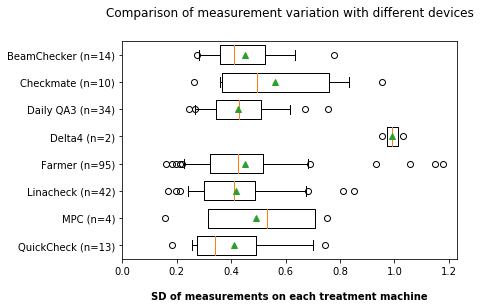

In [36]:
## get the SD from each devices residuals, and then combine same types of device to see if difference in SDs between them

linacheck_sds = []
quickcheck_sds = []
beamchecker_sds = []
dqa3_sds = []
farmer_sds = []
checkmate_sds = []
delta4_sds = []
mpc_sds = []
consistency_sds = []
all_sds = []

for linac in new_both:
    
    ## get all sds
    all_sds.append(np.std(fits[linac]['all']['residuals']))
    
    ## get farmer_sds
    farmer_sds.append(np.std(fits[linac]['farmer']['residuals']))
    
    ## get consistency_sds
    consistency_sds.append(np.std(fits[linac]['consistency']['residuals']))
    
    ## get other device sds using loop for each linac
    linac_devices = fits[linac]['all']['devices']
    
    for device in linac_devices:
        if device == 'linacheck':
            linacheck_sds.append(np.std(fits[linac][device]['residuals']))
        if device == 'quickcheck':
            quickcheck_sds.append(np.std(fits[linac][device]['residuals']))
        if device == 'beamchecker':
            beamchecker_sds.append(np.std(fits[linac][device]['residuals']))
        if device == 'dqa3':
            dqa3_sds.append(np.std(fits[linac][device]['residuals']))
        if device == 'checkmate':
            checkmate_sds.append(np.std(fits[linac][device]['residuals']))
        if device == 'delta4':
            delta4_sds.append(np.std(fits[linac][device]['residuals']))
        if device == 'mpc':
            mpc_sds.append(np.std(fits[linac][device]['residuals']))


all_sd_data = {'linacheck':{'data':linacheck_sds,'label':'Linacheck','pos':7},
             'quickcheck':{'data':quickcheck_sds,'label':'QuickCheck','pos':9},
             'beamchecker':{'data':beamchecker_sds,'label':'BeamChecker','pos':2},
             'dqa3':{'data':dqa3_sds,'label':'Daily QA3','pos':4},
             'farmer':{'data':farmer_sds,'label':'Farmer','pos':6},
             'checkmate':{'data':checkmate_sds,'label':'Checkmate','pos':3},
             'delta4':{'data':delta4_sds,'label':'Delta4','pos':5},
             'mpc':{'data':mpc_sds,'label':'MPC','pos':8},
             'consistency':{'data':consistency_sds,'label':'Consistency','pos':0},
             'all':{'data':all_sds,'label':'All','pos':1}}

exclude = ['all', 'consistency']

for i in all_sd_data:
    data = [all_sd_data[i]['data'] for i in all_sd_data if i not in exclude]
    position = [all_sd_data[i]['pos'] for i in all_sd_data if i not in exclude]
    label = [all_sd_data[i]['label'] + ' (n=' + str(len(all_sd_data[i]['data'])) + ')' for i in all_sd_data if i not in exclude]
    print(i)
    print('n: ',len(all_sd_data[i]['data']))
    print('mean: ',np.mean(all_sd_data[i]['data']))
    print('sd: ',np.std(all_sd_data[i]['data']))
    #print('median: ',np.median(all_sd_data[i]['data']))
    print('min: ',np.min(all_sd_data[i]['data']))
    print('max: ',np.max(all_sd_data[i]['data']))
    print('5th: ',np.percentile(all_sd_data[i]['data'],5))
    print('95th: ',np.percentile(all_sd_data[i]['data'],95))
    print('**')
plt.boxplot(data,positions=position, labels=label,
           vert=False, showmeans=True, whis=[5,95], widths=0.7)

plt.title('Comparison of measurement variation with different devices')
plt.xlabel('SD of measurements on each treatment machine')
plt.gca().invert_yaxis()
plt.xlim(0,)
#plt.savefig('boxplot-SD-device_variation.png', dpi=300, bbox_inches='tight')
plt.show()

## remove 'all' and 'consistency' and improve order and naming of devices.

In [37]:
both

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 83,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 109,
 110,
 111,
 112,
 113,
 126,
 127,
 128,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 165,
 166,
 167,
 170,
 171,
 187,
 188,
 189,
 190,
 195,
 196,
 197,
 198,
 199]

## Fit to Farmer and constancy and plot results

R squared 0.378568517681
Spearmans SpearmanrResult(correlation=0.71653063956996466, pvalue=5.0934865715585203e-20)


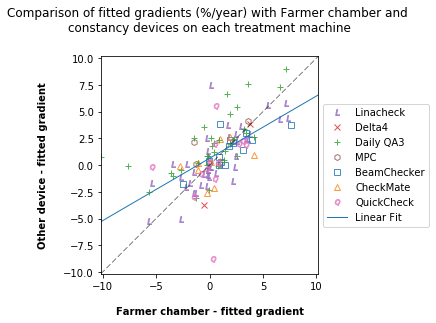

In [38]:
## compare the gradients of each linac as mesured by the different devices.
## want to be able to identify the largest differences for producing example plots etc.
## use farmer as the baseline to compare to.
## produce plot of farmer grad vs device grad
## want to change the colour dependant on the device

from collections import OrderedDict

## loop each linac
farmer_grads = []
device_grads = []
device_colors = []
device_markers = []
device_labels = []

device_col_dict = {'farmer':{'color':'black','marker':'o','label':'Farmer'},
                  'beamchecker':{'color':'C0','marker':'s','label':'BeamChecker'},
                  'checkmate':{'color':'C1','marker':'^','label':'CheckMate'},
                  'dqa3':{'color':'C2','marker':'+','label':'Daily QA3'},
                  'delta4':{'color':'C3','marker':'x','label':'Delta4'},
                  'linacheck':{'color':'C4','marker':'$L$','label':'Linacheck'},
                  'mpc':{'color':'C5','marker':'h','label':'MPC'},
                  'quickcheck':{'color':'C6','marker':'$Q$','label':'QuickCheck'}}

for linac in fits.keys():


    #print(linac, fits[linac]['all']['devices'])
    ## loop each device for on each linac - store results for farmer + other device in 2 lists
    for device in fits[linac]['all']['devices']:
        if device != 'farmer': ## no point comparing farmer to farmer
            farmer_grad = fits[linac]['farmer']['fit_slope']*365
            device_grad = fits[linac][device]['fit_slope']*365
            device_color = device_col_dict[device]['color']
            device_marker = device_col_dict[device]['marker']
            device_label = device_col_dict[device]['label']

            farmer_grads.append(farmer_grad)
            device_grads.append(device_grad)
            device_colors.append(device_color)
            device_markers.append(device_marker)
            device_labels.append(device_label)
            
for i in range(len(farmer_grads)):
    plt.plot(farmer_grads[i],device_grads[i],markerfacecolor='None',alpha=0.8, ls='',
             color = device_colors[i], marker=device_markers[i], label = device_labels[i])
    
plt.title('Comparison of fitted gradients (%/year) with Farmer chamber and \nconstancy devices on each treatment machine')
plt.xlabel('Farmer chamber - fitted gradient')
plt.ylabel('Other device - fitted gradient')

max_grad = max(farmer_grads + device_grads)
min_grad = min(farmer_grads + device_grads)
max_range = max([abs(max_grad), abs(min_grad)]) ## maximum extent required for axes
max_axes = (max_range+0.005)
plt.xlim(-max_axes, max_axes)
plt.ylim(-max_axes, max_axes)

plt.plot([-max_axes,max_axes],[-max_axes,max_axes], ls='--', c='black', lw=0.5) ## diagonal line

## add a linear fit to the plot based on all the data
lin_reg1 = stats.linregress(farmer_grads, device_grads)
x_fit = [-max_axes,max_axes]
y_fit = [lin_reg1.slope * i + lin_reg1.intercept for i in x_fit]
plt.plot(x_fit,y_fit, c='C0', label = 'Linear Fit', lw=1)
print('R squared',lin_reg1.rvalue**2)
print('Spearmans', stats.spearmanr(farmer_grads, device_grads))

plt.legend()
handles, labels = plt.gca().get_legend_handles_labels() ## this aprt removes duplicate legend entries
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5))
plt.axes().set_aspect('equal')
#plt.savefig('farmer_vs_device_slope_fits-linfit.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Daily QA3
slope:  0.743105588964
r2:  0.453218890036
p:  4.56719911642e-05
stderr:  0.154249676446
***
Linacheck
slope:  0.751790439094
r2:  0.460320447403
p:  2.85200899958e-06
stderr:  0.135669866127
***
QuickCheck
slope:  1.02931005637
r2:  0.0669054572291
p:  0.501562195002
stderr:  1.45287833958
***
CheckMate
slope:  1.14123519135
r2:  0.230648746652
p:  0.334997011164
stderr:  1.04215410333
***
BeamChecker
slope:  0.572958716681
r2:  0.168498979209
p:  0.238680201231
stderr:  0.449998528568
***


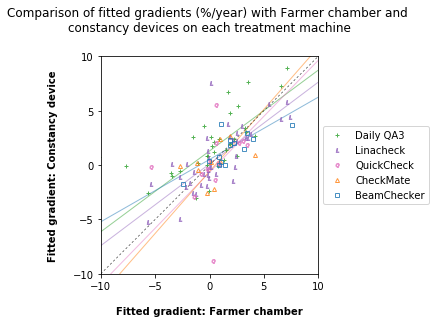

In [39]:
## produce above but with fitted line for each device type

device_df = pd.DataFrame({'farmer_grad':farmer_grads,
                          'device_grad':device_grads,
                          'device':device_labels,
                         'marker':device_markers,
                         'color':device_colors}).sort('farmer_grad') ## construct from lists merged into a dict



axis_lim = 10

for device in device_df['device'].unique():
    if (device != 'Delta4') and (device != 'MPC'):
        data = device_df[device_df['device']==device]
        farmer_data = data['farmer_grad'].tolist()
        device_data = data['device_grad'].tolist()
        plt.plot(farmer_data,device_data,ls='',marker=data['marker'].tolist()[0],color=data['color'].tolist()[0],
                markerfacecolor='None',alpha=0.8,label = device,ms=4)

        ## linear fit for each device - remove highest and lowest gradients
        the_fit = stats.linregress(farmer_data[2:-2],device_data[2:-2])
        print(device)
        print('slope: ', the_fit.slope)
        print('r2: ', the_fit.rvalue**2)
        print('p: ', the_fit.pvalue)
        print('stderr: ' ,the_fit.stderr)
        print('***')

        fit_x = [-axis_lim,axis_lim]
        fit_y = [the_fit.slope*i + the_fit.intercept for i in fit_x]
        plt.plot(fit_x,fit_y,color=data['color'].tolist()[0],alpha=0.5,zorder=0,lw=1)
    
    
    
plt.plot([-axis_lim,axis_lim],[-axis_lim,axis_lim],ls=':',lw=0.5,c='black',zorder=0)
plt.xlim(-axis_lim,axis_lim)
plt.ylim(-axis_lim,axis_lim)
#plt.xticks([-15,-10,-5,0,5,10,15])
plt.yticks([-10,-5,0,5,10])
plt.axes().set_aspect('equal')

plt.title('Comparison of fitted gradients (%/year) with Farmer chamber and \nconstancy devices on each treatment machine')
plt.xlabel('Fitted gradient: Farmer chamber')
plt.ylabel('Fitted gradient: Constancy device')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plt.savefig('new_gradient_comparison-farmervsdevice-3outliers_removed.png',dpi=300,bbox_inches='tight')

plt.show()

59


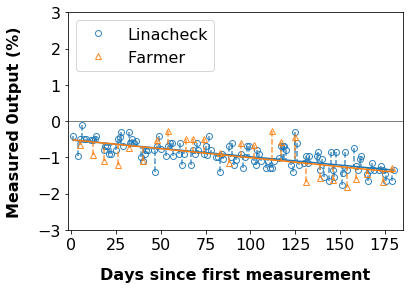

140


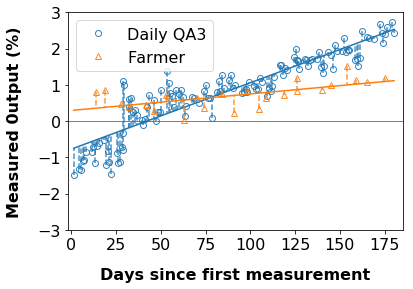

143


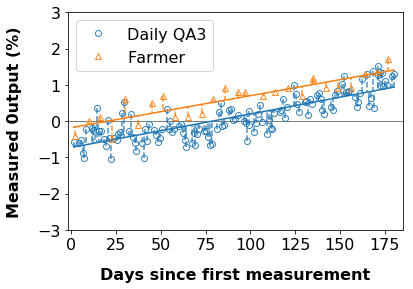

151


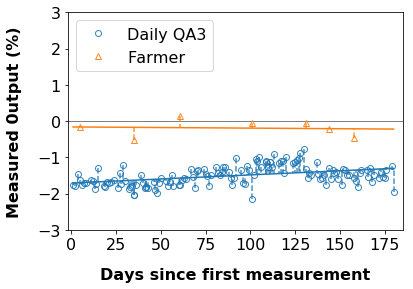

In [40]:
## produce plot showing residuals for each fit for a single linac
## make sure text is larger so can have 4 plots in single figure.

for linac in [59,140,143,151]:#both
#for linac in new_both: ## al linacs?
    print(linac)
    data = df[df['Linac_ID']==linac]
    linac_devices = data['Device_Type'].unique()

    markers = {0:'o',
              1:'^',
              2:'s',
              3:'x',
              4:'*'}

    colors = {0:'C0',
              1:'C1',
              2:'C2',
              3:'C3',
              4:'C4'}

    ## plot the seperate data for each device
    i = 0
    for device in linac_devices:
        device_data = data[data['Device_Type']==device]
        plt.plot(device_data['date_delta'],device_data['Corr_OP'],marker=markers[i], ls='', alpha=0.9,
                 markerfacecolor='None', color = colors[i], label=device_col_dict[device]['label'])

        ## add the seperate fits
        slope = fits[linac][device]['fit_slope']
        intercept = fits[linac][device]['fit_intercept']
        date_min = data['date_delta'].min()
        date_max = data['date_delta'].max()
        fit_x = [date_min,date_max]
        fit_y = [slope*j + intercept for j in fit_x]
        plt.plot(fit_x,fit_y, ls='-', lw=1.5, color = 'C'+str(i))

        ## add a line showing the residuals
        date_vals = device_data['date_delta'].values
        output_vals = device_data['Corr_OP'].values
        fit_vals = [slope*j + intercept for j in date_vals]
        for measurement in range(len(date_vals)):
            plt.plot([date_vals[measurement],date_vals[measurement]], [output_vals[measurement],fit_vals[measurement]],
                     color = colors[i], lw=1.5, ls='--',alpha=0.8)

        i = i+1 ## used for looping through the colours and markers for each device

    plt.legend(loc='upper left',fontsize=16)
    plt.ylim(-3,3)
    plt.yticks([-3,-2,-1,0,1,2,3],fontsize=16)
    plt.axhline(0,color='black',ls='-',lw=0.5,alpha=1,zorder=0)
    #plt.xlim('01-Jan-2015','01-Jul-2015')
    plt.xlim(-2,185)
    plt.xticks(fontsize=16)
    #plt.gcf().axes[0].xaxis.set_major_formatter(my_date_format)
    plt.ylabel('Measured 0utput (%)',fontsize=16)
    plt.xlabel('Days since first measurement',fontsize=16)
    #plt.title('Residuals arising from linear regression for individual device measurements \nTreatment machine ' + str(linac))
    #plt.savefig('fitted-residuals-' + str(linac) + '.png', dpi=300, bbox_inches='tight')
    #plt.clf()
    plt.show()

59
140
143
151


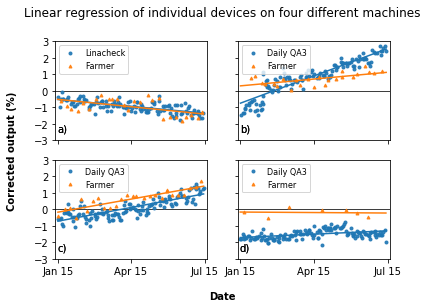

In [41]:
## try and put the above in a single figure so can get correct dpi and line thickness

# row and column sharing
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')

#f.subplots_adjust(wspace=0.1, hspace=0.2)


plot_dict = {0:ax1,
            1:ax2,
            2:ax3,
            3:ax4}
plot_dict_labels = {0:'a)',
            1:'b)',
            2:'c)',
            3:'d)'}

j=0
for linac in [59,140,143,151]:#both
#for linac in new_both: ## al linacs?
    print(linac)
    data = df[df['Linac_ID']==linac]
    linac_devices = data['Device_Type'].unique()

    markers = {0:'o',
              1:'^',
              2:'s',
              3:'x',
              4:'*'}

    colors = {0:'C0',
              1:'C1',
              2:'C2',
              3:'C3',
              4:'C4'}

    ## plot the seperate data for each device
    i = 0
    my_ax = plot_dict[j]
    for device in linac_devices:
        device_data = data[data['Device_Type']==device]
        my_ax.plot(device_data['date_delta'],device_data['Corr_OP'],marker=markers[i], ls='', alpha=0.9,
                 color = colors[i], label=device_col_dict[device]['label'],ms=3)

        ## add the seperate fits
        slope = fits[linac][device]['fit_slope']
        intercept = fits[linac][device]['fit_intercept']
        date_min = data['date_delta'].min()
        date_max = data['date_delta'].max()
        fit_x = [date_min,date_max]
        fit_y = [slope*j + intercept for j in fit_x]
        my_ax.plot(fit_x,fit_y, ls='-', lw=1.5, color = 'C'+str(i))

        ## add a line showing the residuals
        date_vals = device_data['date_delta'].values
        output_vals = device_data['Corr_OP'].values
        fit_vals = [slope*j + intercept for j in date_vals]
        #for measurement in range(len(date_vals)):
        #    my_ax.plot([date_vals[measurement],date_vals[measurement]], [output_vals[measurement],fit_vals[measurement]],
        #             color = colors[i], lw=1.5, ls='--',alpha=0.8)

        i = i+1 ## used for looping through the colours and markers for each device
        my_ax.set_ylim(-3,3)
        my_ax.set_xlim(-2,185)
        my_ax.set_yticks([-3,-2,-1,0,1,2,3])
        my_ax.set_xticks([1,91,182])
        my_ax.set_xticklabels(['Jan 15','Apr 15', 'Jul 15'])
        my_ax.legend(loc='upper left',fontsize=8)
        my_ax.axhline(0,color='black',ls='-',lw=0.5,alpha=1,zorder=0)
        
        my_text = plot_dict_labels[j]
        my_ax.text(0.5,-2.5,my_text)

    j=j+1
    

## add common labels and title
f.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xlabel("Date")
plt.ylabel("Corrected output (%)")
plt.title('Linear regression of individual devices on four different machines')

#add text to each A,B,C,D


#plt.savefig('fitted-residuals-4plots.png', dpi=300, bbox_inches='tight')

plt.show()

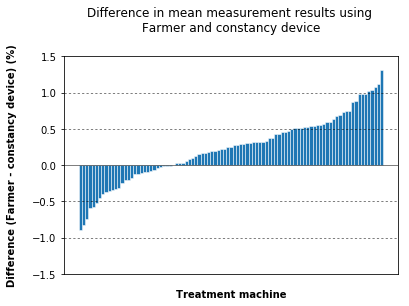

max 1.31606849958
min -0.900195331857


In [42]:
all_difs = []
all_difs_abs = []
for linac in new_both:
    all_difs.append(means[linac]['dif'])
    all_difs_abs.append(np.abs(means[linac]['dif']))
sorted_difs = sorted(all_difs)
sorted_difs_abs = sorted(all_difs_abs)
#plt.plot(sorted_difs,'o', ms=2)
plt.bar(height=sorted_difs,left=range(len(sorted_difs)),width=1,edgecolor='white',linewidth=0.5)
plt.xlabel('Treatment machine')
plt.ylabel('Difference (Farmer - constancy device) (%)')
plt.title('Difference in mean measurement results using \nFarmer and constancy device')
plt.ylim(-1.5,1.5)
plt.axhline(0,ls='-',c='black',lw=0.5)
for i in [-1.,-0.5,0.5,1]:
    plt.axhline(i,ls=':',c='black',lw=0.5)
plt.xticks([])
#plt.savefig('Dif between measurement devices-all.png',dpi=300,bbox_inches='tight')
plt.show()

print('max',max(sorted_difs))
print('min',min(sorted_difs))

## how many are positive?

In [43]:
greater = [i for i in all_difs if i>0]
print(len(all_difs))
print(len(greater))
print(np.mean(all_difs))

95
65
0.233928068397


In [44]:
stats.ttest_1samp(all_difs,0)

Ttest_1sampResult(statistic=5.0208918783583814, pvalue=2.4350798364477462e-06)

## Convert gradient to calibration frequency

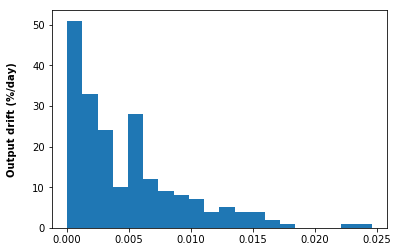

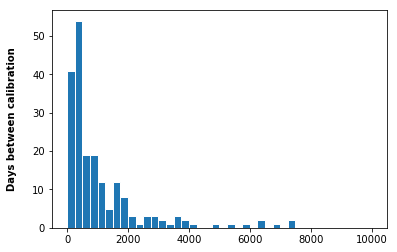

In [60]:
the_fits1 = [np.abs(i) for i in trend_df['slope'].tolist()] ## get absolute values of gradients for each linac

calib_days = [np.sqrt((2/i)**2) for i in the_fits1]
plt.hist(the_fits1,bins=20)
plt.ylabel('Output drift (%/day)')
plt.show()

plt.hist(calib_days,bins=40,range=(0,10000),edgecolor='white')
plt.ylabel('Days between calibration')
#plt.xlim(0,1500)
plt.show()

In [52]:
trend_df['slope'].describe()

count    204.000000
mean       0.002450
std        0.006224
min       -0.024559
25%       -0.000948
50%        0.001539
75%        0.005903
max        0.022969
Name: slope, dtype: float64

In [80]:
## what is the spread of calibration frequencies for different tolerances?
## assume all machines start with output = 0 and then are calibrated when they exceed the tolerance.

def num_days_to_tol(linac, tol, start=0):
    """ Calcalate the number of days until linac would exceed tolerance.
    Assume start at 0 (start=0).
    Rounded up to nearest whole number of days"""
    rate=lin_fit_corr[linac]['slope']
    if rate > 0:
        change = abs(tol)-start
    else: change = abs(tol)+start
    num_days = change/rate
    return abs(np.ceil(num_days))

days_to_cal = {}

for linac in df['Linac_ID'].unique():
    days_to_cal[linac] = num_days_to_tol(linac=linac,tol=1,start=0)

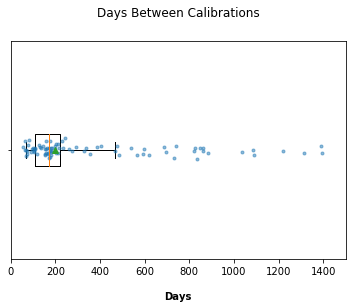

In [81]:
## boxplot of results

remove_outliers = 30

plt.boxplot(sorted(list(days_to_cal.values()))[:-remove_outliers-1],
            showfliers=False, whis=[5,95], labels=[''], vert=False, showmeans=True)

## plot the individual points too
plt.plot(list(days_to_cal.values()),np.random.normal(loc=1, scale=0.02, size=len(days_to_cal)),'o', alpha=0.5, ms=3)

plt.xlabel('Days')
plt.xlim(0,1500)
#plt.xscale('log')
plt.title('Days Between Calibrations')
#plt.savefig('Days_between_cals.png',dpi=300,bbox_inches='tight')
plt.show()

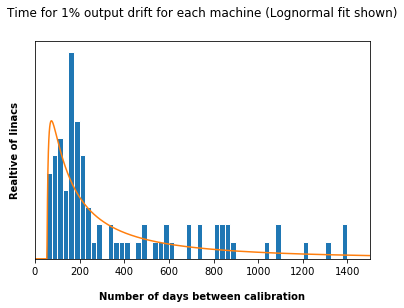

In [85]:
fit = stats.lognorm.fit(list(days_to_cal.values()))
#print(fit)
#print(int(np.ceil(max(days_to_cal.values()))))

## the x and y results from the fit
x = list(range(0,int(np.ceil(max(days_to_cal.values())))))
y = stats.lognorm.pdf(x, *fit)

plt.hist(list(days_to_cal.values()),bins=60, range=(0,1500),normed=True,edgecolor='white')
plt.plot(x,y)

plt.xlim(0,1500)
plt.yticks([])
plt.ylabel('Realtive of linacs')
plt.xlabel('Number of days between calibration')
plt.title('Time for 1% output drift for each machine (Lognormal fit shown)')
#plt.savefig('trend_freq_dist-thesis.png',dpi=300, bbox_inches='tight')
plt.show()